#  germantrafficsigns

In [1]:
#load the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.io import loadmat
import pickle
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = '../ten-datasets/germantrafficsigns/'

#load the dataset into a dataframe
df = pd.read_csv(path + 'signnames.csv')

FileNotFoundError: [Errno 2] File b'../ten-datasets/germantrafficsigns/signnames.csv' does not exist: b'../ten-datasets/germantrafficsigns/signnames.csv'

In [ ]:
num_classes = df.shape[0]
print(df.shape)
df.head()

In [108]:
#load the dataset into a dataframe

training_file = path+"train.p"
testing_file = path+"test.p"
validation_file= path+"valid.p"

with open(training_file, mode='rb') as f:
    train_data = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test_data = pickle.load(f)
    
with open(validation_file, mode='rb') as f:
    valid_data = pickle.load(f)

In [109]:
X_train, y_train = train_data['features'],train_data['labels']
X_test, y_test = test_data['features'],test_data['labels']
X_valid, y_valid = valid_data['features'],valid_data['labels']

In [110]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)


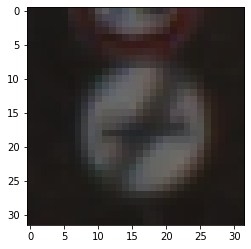

In [111]:
plt.imshow(X_train[0])

In [112]:
print("Number of classes: {}".format(num_classes))
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Number of classes: 43
Image Shape: (32, 32, 3)
Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


# Preprocess Data
## Shuffle the training data.


(34799, 32, 32, 3)

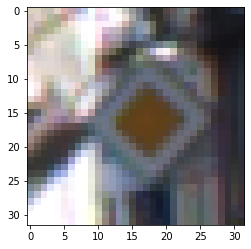

In [113]:
X_train, y_train = shuffle(X_train, y_train)
plt.imshow(X_train[0])
X_train.shape

# shallow learning

> ### RandomForest

> ### Softmax Regression

### data processing

In [114]:
import cv2

In [115]:
def equi_hist(image):
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    return image

In [116]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [117]:
X_train_adv = np.array(list(map(preprocess, X_train)))
X_test_adv = np.array(list(map(preprocess, X_test)))
X_valid_adv = np.array(list(map(preprocess, X_valid)))


(34799, 32, 32)

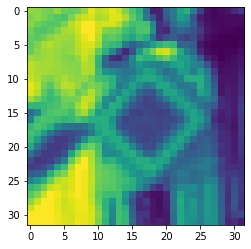

In [118]:
plt.imshow(X_train_adv[0])
X_train_adv.shape # one channel gray image

In [119]:
def to_2_dim(X_org):
    print("before: ",X_org.shape)
    X_size = len(X_org)
    TwoDim_X = X_org.reshape(X_size,-1)
    print("after:",TwoDim_X.shape)
    return TwoDim_X


In [120]:
TwoDim_X_train_adv= to_2_dim(X_train_adv) # to 2 dim
TwoDim_X_test_adv = to_2_dim(X_test_adv)
TwoDim_X_valid_adv = to_2_dim(X_valid_adv)

before:  (34799, 32, 32)
after: (34799, 1024)
before:  (12630, 32, 32)
after: (12630, 1024)
before:  (4410, 32, 32)
after: (4410, 1024)


## Random Forest


In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
%%time

forest = RandomForestClassifier(criterion='gini', max_leaf_nodes=50,
                                n_estimators = 800, random_state =1,
                                n_jobs =-1,verbose=True, oob_score=True)
forest.fit(TwoDim_X_train_adv,y_train)
forest.oob_score_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.4min finished


CPU times: user 8min 56s, sys: 6.89 s, total: 9min 3s
Wall time: 1min 45s


0.6680651742866174

In [123]:
%%time
y_train_predict = forest.predict_proba(TwoDim_X_train_adv).argmax(axis = 1)
print ("forest Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
y_train_predict

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.1s


forest Train Accuracy: 0.680
CPU times: user 22 s, sys: 1.56 s, total: 23.6 s
Wall time: 5.69 s


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    5.4s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    5.5s finished


array([12, 26, 38, ..., 35, 13, 11])

In [124]:
y_valid_predict = forest.predict_proba(TwoDim_X_valid_adv).argmax(axis = 1)
print("softmax_reg Test Accuracy: %.3f" % accuracy_score(y_valid,y_valid_predict))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.4s


softmax_reg Test Accuracy: 0.638


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.7s finished


In [125]:
%%time
y_test_predict = forest.predict_proba(TwoDim_X_test_adv).argmax(axis = 1)
print("forest Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.1s


forest Test Accuracy: 0.623
CPU times: user 8.16 s, sys: 785 ms, total: 8.95 s
Wall time: 2.29 s


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    2.1s finished


## Softmax Regression

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
%%time
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(TwoDim_X_train_adv, y_train)

CPU times: user 1min 18s, sys: 1.49 s, total: 1min 20s
Wall time: 20.6 s


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
%%time
y_train_predict = softmax_reg.predict_proba(TwoDim_X_train_adv).argmax(axis = 1)
print ("softmax_reg Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

softmax_reg Train Accuracy: 0.912
CPU times: user 586 ms, sys: 22.6 ms, total: 609 ms
Wall time: 168 ms


In [129]:
y_valid_predict = softmax_reg.predict_proba(TwoDim_X_valid_adv).argmax(axis = 1)
print("softmax_reg Test Accuracy: %.3f" % accuracy_score(y_valid,y_valid_predict))

softmax_reg Test Accuracy: 0.802


In [130]:
y_test_predict = softmax_reg.predict_proba(TwoDim_X_test_adv).argmax(axis = 1)
print("softmax_reg Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

softmax_reg Test Accuracy: 0.796


# deep learning
> ### ANN
> ### CNN

In [131]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from keras import backend as K
from keras.layers.recurrent import SimpleRNN
from keras.utils.vis_utils import plot_model

In [132]:
print(X_train.shape)
print(y_train.shape)
y_train[0]

(34799, 32, 32, 3)
(34799,)


12

# Normalization


In [133]:

batch_size = 128
num_classes = 43 # 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32 

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)


X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'valid samples')
print(X_test.shape[0], 'test samples')

y_train = y_train.reshape(y_train.shape[0])
y_valid = y_valid.reshape(y_valid.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print(y_train.shape)
print(y_test.shape)

# convert class vectors to binary class matrices  
y_train = keras.utils.to_categorical(y_train, num_classes) #one hot encoding
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

X_train shape: (34799, 32, 32, 3)
34799 train samples
4410 valid samples
12630 test samples
(34799,)
(12630,)


(34799, 43)

## CNN

In [134]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',padding='same',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


# image_name = 'trafficSigns_cnn_model.png'
# plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
# plt.figure(figsize=(20,20))
# img = plt.imread(image_name)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               2097280   
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)              

In [142]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

print(y_valid.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)
(4410,)


In [149]:
%%time

hist = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                 validation_data=(X_test, y_test)
                )
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 34799 samples, validate on 12630 samples
Epoch 1/5
34799/34799 [==============================] - 9s 270us/step - loss: 2.3106 - accuracy: 0.3714 - val_loss: 1.2409 - val_accuracy: 0.6307
Epoch 2/5
34799/34799 [==============================] - 9s 257us/step - loss: 0.9459 - accuracy: 0.7168 - val_loss: 0.8374 - val_accuracy: 0.7515
Epoch 3/5
34799/34799 [==============================] - 9s 264us/step - loss: 0.6292 - accuracy: 0.8121 - val_loss: 0.7582 - val_accuracy: 0.7749
Epoch 4/5
34799/34799 [==============================] - 10s 281us/step - loss: 0.5225 - accuracy: 0.8438 - val_loss: 0.6685 - val_accuracy: 0.8162
Epoch 5/5
34799/34799 [==============================] - 10s 291us/step - loss: 0.4531 - accuracy: 0.8660 - val_loss: 0.7048 - val_accuracy: 0.7994
Test loss: 0.7048141212002776
Test accuracy: 0.7993665933609009
CPU times: user 2min 57s, sys: 53.4 s, total: 3min 51s
Wall time: 49.6 s


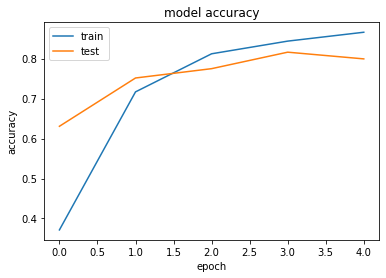

In [150]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

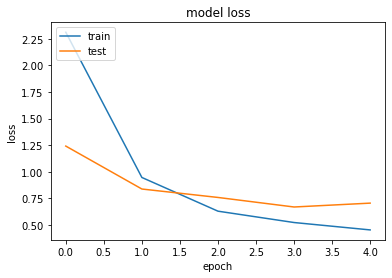

In [151]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [152]:
score = model.evaluate(X_test, y_test, verbose=0)


In [153]:
predictions = model.predict(X_test) #X_test, y_test

In [154]:
predictions[2]

array([2.8937876e-12, 3.8332784e-13, 2.2640860e-11, 1.0930914e-08,
       1.0384857e-11, 1.6348685e-10, 3.3824907e-08, 2.0152710e-12,
       2.4312925e-09, 3.5687842e-10, 1.7431355e-10, 1.3682125e-11,
       7.8103817e-08, 6.1080641e-08, 2.3347440e-11, 1.3119643e-09,
       1.5715174e-11, 1.9493951e-10, 7.0741728e-09, 3.4210648e-11,
       4.0157596e-05, 2.3573806e-12, 2.1100705e-07, 2.6051607e-08,
       1.6180400e-09, 1.0397127e-07, 1.3387754e-08, 4.5104193e-10,
       2.5218077e-08, 1.3905848e-09, 8.7752444e-10, 1.5121245e-10,
       9.0959361e-07, 9.4165689e-09, 3.7316226e-05, 4.9800260e-06,
       3.7105368e-05, 3.0483509e-08, 9.9987781e-01, 1.7594706e-09,
       5.3669197e-07, 5.6939859e-07, 1.9448736e-08], dtype=float32)

In [155]:
y_test[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# ANN

In [156]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Flatten,Conv1D,GlobalMaxPooling1D,MaxPooling1D,GlobalAveragePooling1D,Input,MaxPool1D,BatchNormalization


In [157]:
model = Sequential()
# model.add(Flatten(input_shape=X_train.shape + (3,)))
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.25))


model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


# image_name = 'trafficSigns_ann_model.png'
# plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
# plt.figure(figsize=(20,20))
# img = plt.imread(image_name)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 43)                11051     
Total params: 1,715,755
Trainable params: 1,715,755
Non-trainable params: 0
____________________________________________

In [158]:
hist = model.fit(X_train, y_train,batch_size=128,epochs=10,verbose=1,shuffle=True,
                 validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 34799 samples, validate on 12630 samples
Epoch 1/10
34799/34799 [==============================] - 12s 357us/step - loss: 2.1547 - accuracy: 0.4065 - val_loss: 1.1906 - val_accuracy: 0.6693
Epoch 2/10
34799/34799 [==============================] - 11s 324us/step - loss: 0.8912 - accuracy: 0.7340 - val_loss: 0.9052 - val_accuracy: 0.7419
Epoch 3/10
34799/34799 [==============================] - 10s 295us/step - loss: 0.6125 - accuracy: 0.8159 - val_loss: 0.6621 - val_accuracy: 0.8161
Epoch 4/10
34799/34799 [==============================] - 10s 294us/step - loss: 0.5032 - accuracy: 0.8482 - val_loss: 0.6867 - val_accuracy: 0.8131
Epoch 5/10
34799/34799 [==============================] - 9s 267us/step - loss: 0.4680 - accuracy: 0.8586 - val_loss: 0.7008 - val_accuracy: 0.8188
Epoch 6/10
34799/34799 [==============================] - 9s 256us/step - loss: 0.3908 - accuracy: 0.8823 - val_loss: 0.6213 - val_accuracy: 0.8363
Epoch 7/10
34799/34799 [==============================] - 

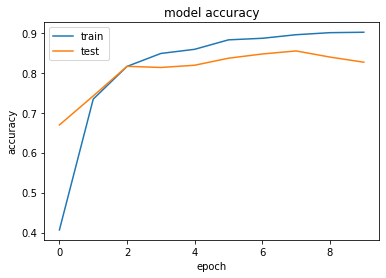

In [159]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

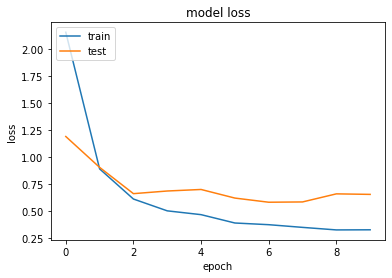

In [160]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [161]:
predictions = model.predict(X_test) #X_test, y_test

In [162]:
predictions[2]

array([6.16110692e-14, 5.86520510e-14, 2.52659369e-11, 3.92576105e-09,
       2.27861024e-12, 1.26765126e-10, 3.89598309e-09, 1.70029287e-13,
       5.63441627e-10, 5.60098634e-10, 1.08207453e-11, 2.80297378e-12,
       9.05640674e-10, 8.14289136e-10, 2.11004066e-12, 2.57726929e-09,
       2.08780302e-11, 3.66060724e-13, 3.97296862e-09, 1.17965941e-11,
       4.66911843e-06, 6.65594153e-14, 3.53672647e-09, 8.72218298e-09,
       1.88369320e-10, 2.41105580e-09, 1.51073039e-08, 4.60051885e-10,
       5.21680343e-09, 1.70071301e-11, 3.59479835e-10, 9.32444122e-11,
       5.41795373e-07, 3.00815872e-10, 6.69232486e-06, 2.40792389e-07,
       4.05291721e-05, 6.48483933e-10, 9.99946237e-01, 8.67159747e-11,
       2.17524530e-07, 8.64814410e-07, 1.09433754e-10], dtype=float32)

In [163]:
y_test[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## RNN

In [165]:
from keras.layers.recurrent import SimpleRNN

In [166]:
print(X_train_adv.shape)
print(X_test_adv.shape)

(34799, 32, 32)
(12630, 32, 32)


In [167]:
model = Sequential()
model.add(SimpleRNN(units = 50, input_shape=(32,32) ))
# model.add(Dropout(0.2))
# model.add(SimpleRNN(units = 50 ))
# model.add(Dropout(0.2))
# model.add(SimpleRNN(50,return_sequences=True))

model.add(Dense(43,activation = "softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

# image_name = 'trafficSigns_rnn_model.png'
# plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
# plt.figure(figsize=(10,10))
# img = plt.imread(image_name)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                4150      
_________________________________________________________________
dense_18 (Dense)             (None, 43)                2193      
Total params: 6,343
Trainable params: 6,343
Non-trainable params: 0
_________________________________________________________________


In [168]:
hist = model.fit(X_train_adv, y_train,batch_size=128,epochs=20,verbose=1,shuffle=True,
                 validation_data=(X_test_adv, y_test))
score = model.evaluate(X_test_adv, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 34799 samples, validate on 12630 samples
Epoch 1/20
34799/34799 [==============================] - 6s 173us/step - loss: 2.9867 - accuracy: 0.1782 - val_loss: 2.6304 - val_accuracy: 0.2545
Epoch 2/20
34799/34799 [==============================] - 3s 91us/step - loss: 2.2973 - accuracy: 0.3216 - val_loss: 2.2780 - val_accuracy: 0.3442
Epoch 3/20
34799/34799 [==============================] - 3s 89us/step - loss: 1.9518 - accuracy: 0.4115 - val_loss: 2.0628 - val_accuracy: 0.3930
Epoch 4/20
34799/34799 [==============================] - 3s 89us/step - loss: 1.7332 - accuracy: 0.4717 - val_loss: 1.8486 - val_accuracy: 0.4633
Epoch 5/20
34799/34799 [==============================] - 3s 100us/step - loss: 1.5723 - accuracy: 0.5195 - val_loss: 1.8193 - val_accuracy: 0.4614
Epoch 6/20
34799/34799 [==============================] - 3s 94us/step - loss: 1.4588 - accuracy: 0.5516 - val_loss: 1.6611 - val_accuracy: 0.5164
Epoch 7/20
34799/34799 [==============================] - 3s 100us

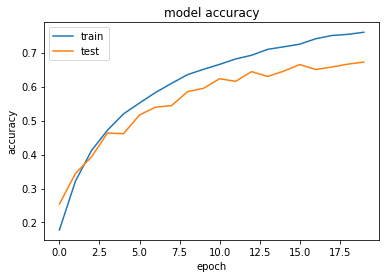

In [169]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

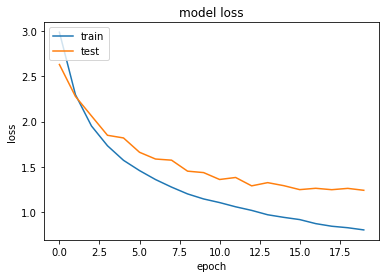

In [170]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()